Exploratory Data Analysis (EDA) for layoffs across different industries and countries. This EDA helps uncover patterns, trends and anomalies in the dataset.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [9]:
df=pd.read_csv('layoffs.csv')
df.head(20)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
5,Embark Trucks,SF Bay Area,Transportation,230.0,0.70,3/3/2023,Post-IPO,United States,317.0
6,Lendi,Sydney,Real Estate,100.0,NaN,3/3/2023,Unknown,Australia,59.0
7,UserTesting,SF Bay Area,Marketing,63.0,NaN,3/3/2023,Acquired,United States,152.0
8,Airbnb,SF Bay Area,NaN,30.0,NaN,3/3/2023,Post-IPO,United States,6400.0
9,Accolade,Seattle,Healthcare,NaN,NaN,3/3/2023,Post-IPO,United States,458.0


Understanding the dataset

In [5]:
df.shape

(2361, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                2361 non-null   object 
 1   location               2361 non-null   object 
 2   industry               2357 non-null   object 
 3   total_laid_off         1621 non-null   float64
 4   percentage_laid_off    1576 non-null   float64
 5   date                   2360 non-null   object 
 6   stage                  2355 non-null   object 
 7   country                2361 non-null   object 
 8   funds_raised_millions  2152 non-null   float64
dtypes: float64(3), object(6)
memory usage: 166.1+ KB


Cleaning the dataset

In [7]:
df['date'].value_counts()

date
4/2/2020      27
4/3/2020      25
1/18/2023     24
3/27/2020     23
4/8/2020      21
              ..
11/2/2021      1
8/18/2020      1
8/17/2020      1
11/18/2021     1
3/11/2020      1
Name: count, Length: 483, dtype: int64

In [10]:
df['stage'].value_counts()

stage
Post-IPO          428
Unknown           393
Series B          305
Series C          303
Series D          225
Series A          177
Acquired          172
Series E          125
Series F           65
Seed               65
Private Equity     38
Series H           24
Series G           15
Series J            8
Series I            7
Subsidiary          5
Name: count, dtype: int64

In [12]:
df[['company', 'location', 'industry', 'total_laid_off',
       'percentage_laid_off', 'date', 
    #'stage'# 
    'country','funds_raised_millions']]

,company,location,industry,total_laid_off,percentage_laid_off,date,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Brazil,788.0
...,...,...,...,...,...,...,...,...
2356,Blackbaud,Charleston,Other,500.0,0.14,NaN,United States,NaN
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2/9/2023,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,United States,339.0


How to drop a column

In [14]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


In [15]:
df.drop(['stage'], axis=1,)

,company,location,industry,total_laid_off,percentage_laid_off,date,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Brazil,788.0
...,...,...,...,...,...,...,...,...
2356,Blackbaud,Charleston,Other,500.0,0.14,NaN,United States,NaN
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2/9/2023,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,United States,339.0


In [16]:
df['date']

0         3/6/2023
1         3/6/2023
2         3/6/2023
3         3/6/2023
4         3/3/2023
           ...    
2356           NaN
2357      2/9/2023
2358     3/30/2020
2359     9/14/2021
2360    11/28/2022
Name: date, Length: 2361, dtype: object

Converting date from object to date time

In [17]:
pd.to_datetime(df['date'])

0      2023-03-06
1      2023-03-06
2      2023-03-06
3      2023-03-06
4      2023-03-03
          ...    
2356          NaT
2357   2023-02-09
2358   2020-03-30
2359   2021-09-14
2360   2022-11-28
Name: date, Length: 2361, dtype: datetime64[ns]

Renaming columns in the dataset

In [18]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


In [28]:
df.Country.value_counts()

Country
United States           1541
India                    148
Canada                    99
Brazil                    77
United Kingdom            74
Germany                   68
Israel                    56
Australia                 54
Singapore                 34
Indonesia                 24
Sweden                    20
China                     18
Nigeria                   15
Netherlands               13
France                     7
United Arab Emirates       6
Kenya                      6
Argentina                  6
Hong Kong                  5
Estonia                    5
Ireland                    5
Colombia                   4
Mexico                     4
Seychelles                 4
Norway                     4
Finland                    4
Denmark                    4
United States.             4
Chile                      3
Portugal                   3
Austria                    3
Vietnam                    3
Malaysia                   3
Pakistan                   3
Luxemb

In [19]:
df.rename(columns={'company':'Company',
                   'location':'Location',
                   'industry':'Industry',
                   'total_laid_off':'Total_laid_off',
                   'percentage_laid_off':'Percentage_laid_off',
                   'date':'Date',
                   'stage':'Stage',
                   'country':'Country',
                   'funds_raised_millions':'Funds_raised'}, inplace=True)

In [20]:
df.head()

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


Identify missing values in the dataset

In [22]:
df.isna()

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2356,False,False,False,False,False,True,False,False,True
2357,False,False,False,False,False,False,False,False,False
2358,False,False,False,False,False,False,False,False,False
2359,False,False,False,True,True,False,False,False,False


Find sum of unknown values per column

In [23]:
df.isna().sum()

Company                  0
Location                 0
Industry                 4
Total_laid_off         740
Percentage_laid_off    785
Date                     1
Stage                    6
Country                  0
Funds_raised           209
dtype: int64

Finding duplicated rows in the dataset

In [24]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2356    False
2357     True
2358     True
2359     True
2360     True
Length: 2361, dtype: bool

Narrow down to duplicated specific values in the dataset


In [25]:
df.loc[df.duplicated()]

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
1492,Cazoo,London,Transportation,750.0,0.15,6/7/2022,Post-IPO,United Kingdom,2000.0
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2/9/2023,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,Post-IPO,United States,339.0
2360,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,11/28/2022,Unknown,Brazil,260.0


Find why there is duplicated rows in the dataset in company column

In [26]:
df.loc[df.duplicated(subset=['Company'])].head()

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
169,Getir,New York City,Food,100.0,NaN,2/2/2023,Series E,United States,1800.0
260,Bolt,SF Bay Area,Finance,50.0,0.1,1/24/2023,Series E,United States,1300.0
370,Arch Oncology,Brisbane,Healthcare,NaN,1.0,1/13/2023,Series C,United States,155.0
402,Oyster,Charlotte,HR,NaN,NaN,1/11/2023,Series C,United States,224.0
442,Twitter,SF Bay Area,Consumer,40.0,NaN,1/5/2023,Post-IPO,United States,12900.0


Looking how many multiple values are duplicated in the dataset using query cmd for Getir company

In [29]:
df.query('Company=="Getir"')

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
111,Getir,London,Food,NaN,NaN,2/13/2023,Series E,United Kingdom,1800.0
169,Getir,New York City,Food,100.0,NaN,2/2/2023,Series E,United States,1800.0
1564,Getir,Istanbul,Food,NaN,0.14,5/25/2022,Series E,Turkey,1800.0


Looking how many multiple values are duplicated in the dataset using query cmd for Arch Oncology company

In [30]:
df.query('Company=="Arch Oncology"')

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
57,Arch Oncology,St. Louis,Healthcare,NaN,NaN,2/22/2023,Series C,United States,155.0
370,Arch Oncology,Brisbane,Healthcare,NaN,1.0,1/13/2023,Series C,United States,155.0


Looking how many multiple values are duplicated in the dataset using query cmd for Bolt company

In [34]:
df.query('Company=="Bolt"')

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
64,Bolt,Lagos,Transportation,17.0,NaN,2/21/2023,Series F,Nigeria,NaN
260,Bolt,SF Bay Area,Finance,50.0,0.10,1/24/2023,Series E,United States,1300.0
1558,Bolt,SF Bay Area,Finance,240.0,0.27,5/25/2022,Series E,United States,1300.0


Looking how many multiple values are duplicated in the dataset using query cmd for Oyster company

In [35]:
df.query('Company=="Oyster"')

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
221,Oyster,Charlotte,HR,NaN,NaN,1/30/2023,Series C,United States,224.0
402,Oyster,Charlotte,HR,NaN,NaN,1/11/2023,Series C,United States,224.0


Looking how many multiple values are duplicated in the dataset using query cmd for Twitter company

In [36]:
df.query('Company=="Twitter"')

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
38,Twitter,SF Bay Area,Consumer,200.0,0.1,2/25/2023,Post-IPO,United States,12900.0
442,Twitter,SF Bay Area,Consumer,40.0,NaN,1/5/2023,Post-IPO,United States,12900.0
781,Twitter,SF Bay Area,Consumer,3700.0,0.5,11/4/2022,Post-IPO,United States,12900.0
1311,Twitter,SF Bay Area,Consumer,NaN,NaN,7/7/2022,Post-IPO,United States,5700.0


In [37]:
df.shape

(2361, 9)

Univariate analysis by plotting feature distribution by finding out how layoffs happened on daily basis and find if there is any outlier in the dataset

In [38]:
df.head()

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


Analysis to check which date had the highest no of employees laid off.

In [44]:
df[['Total_laid_off','Date']]

,Total_laid_off,Date
0,500.0,3/6/2023
1,475.0,3/6/2023
2,400.0,3/6/2023
3,120.0,3/6/2023
4,340.0,3/3/2023
...,...,...
2356,500.0,NaN
2357,1600.0,2/9/2023
2358,70.0,3/30/2020
2359,NaN,9/14/2021


Bar chart analysing top 10 days with highest layoffs.

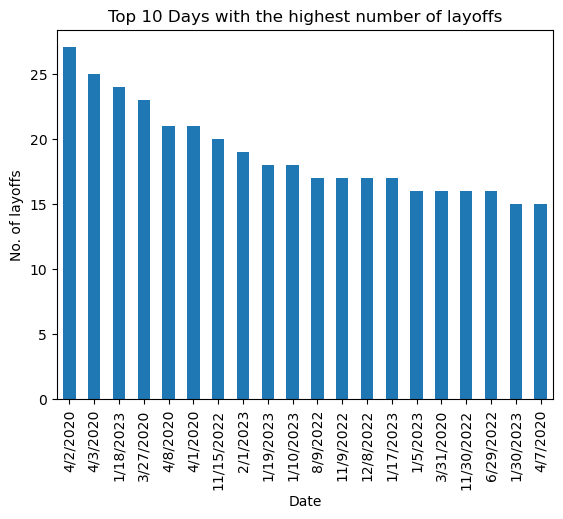

In [68]:
ax = df['Date'].value_counts()\
    .head(20)\
    .plot(kind='bar', title='Top 10 Days with the highest number of layoffs')
ax.set_xlabel('Date')
ax.set_ylabel('No. of layoffs')
plt.show()

Histogram analysis distribution of laysoffs across the industries

In [55]:
df['Industry'].value_counts()

Industry
Finance            284
Retail             195
Healthcare         183
Transportation     148
Food               141
Marketing          139
Other              129
Consumer           118
Real Estate        117
Crypto              99
Media               95
Education           93
Data                79
Security            74
HR                  66
Travel              66
Support             43
Infrastructure      43
Logistics           42
Sales               37
Product             35
Fitness             31
Recruiting          28
Hardware            17
Construction        16
Legal               13
Energy              12
Aerospace            6
Fin-Tech             3
Manufacturing        2
Crypto Currency      2
CryptoCurrency       1
Name: count, dtype: int64

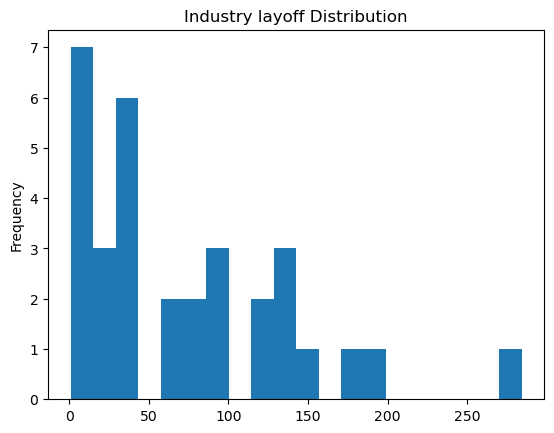

In [67]:
df['Industry'].value_counts().plot(kind='hist',
                                   bins=20, title='Industry layoff Distribution')
ax.set_xlabel('Industry')
plt.show()


Feature Relations 
Finding how different features relate on the dataset using scatter plot

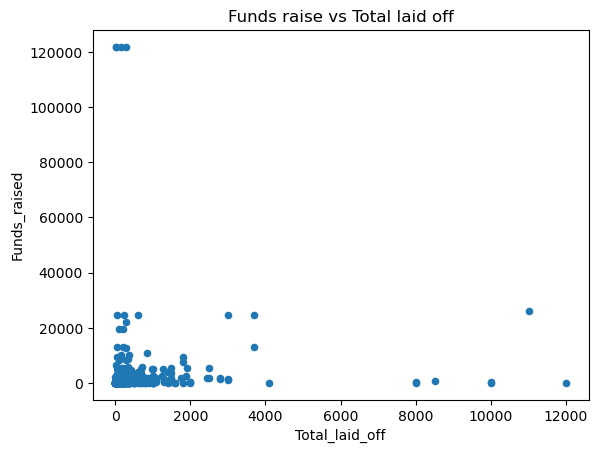

In [66]:
df.plot(kind='scatter', x='Total_laid_off',
        y='Funds_raised',
        title='Funds raise vs Total laid off')
plt.show()

What is the correlation between Total laidoffs, Percentage of the individual laid off and the Total funds raised drop off the unknown values

In [69]:
df[['Total_laid_off','Percentage_laid_off','Funds_raised']].dropna().corr()

,Total_laid_off,Percentage_laid_off,Funds_raised
Total_laid_off,1.000000,-0.044828,0.106777
Percentage_laid_off,-0.044828,1.000000,-0.066463
Funds_raised,0.106777,-0.066463,1.000000


Which industry has the highest number of layoffs(minimum of 10)

In [70]:
df.head()

,Company,Location,Industry,Total_laid_off,Percentage_laid_off,Date,Stage,Country,Funds_raised
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0


In [75]:
df.query('Industry != "Other"')\
    .groupby('Industry')['Total_laid_off']\
    .agg(['mean','count'])\
    .query('count >= 20')\
    .sort_values('mean', ascending=False)


,mean,count
Industry,,
Consumer,536.574713,87
Fitness,416.571429,21
Sales,388.705882,34
Travel,364.446809,47
Retail,330.401515,132
Transportation,293.559633,109
Infrastructure,251.521739,23
Food,243.138298,94
Real Estate,231.118421,76


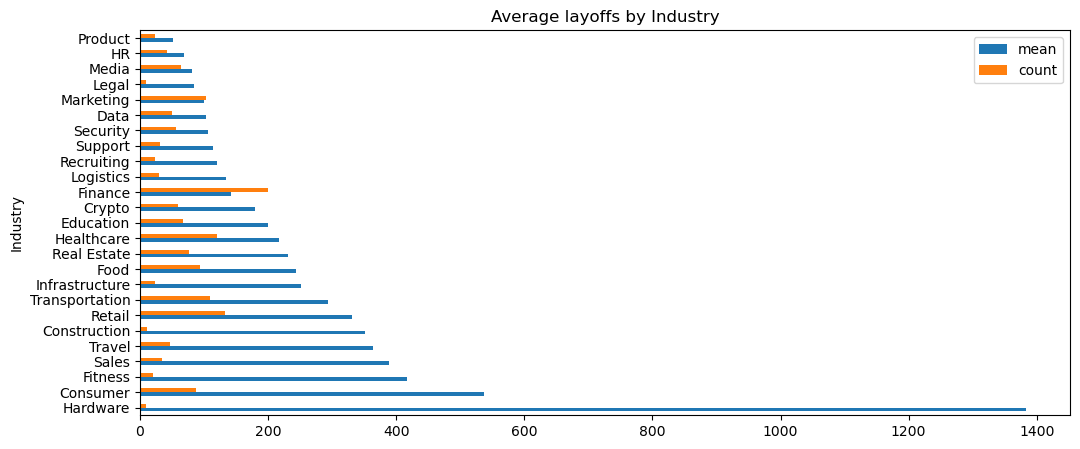

In [78]:
ax= df.query('Industry != "Other"')\
    .groupby('Industry')['Total_laid_off']\
    .agg(['mean','count'])\
    .query('count >= 10')\
    .sort_values('mean', ascending=False)\
    .plot(kind='barh',figsize=(12,5), title='Average layoffs by Industry')
plt.show()